In [9]:
import numpy as np
from TDD.TDD import Ini_TDD,Clear_TDD,set_index_order,get_unique_table_num,set_root_of_unit,get_count
from TDD.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs,gen_cir
from TDD.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
import cProfile

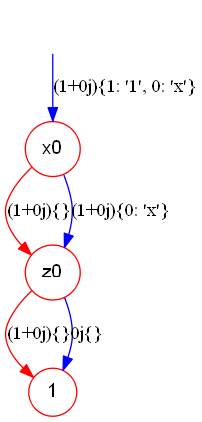

In [10]:
Ini_TDD(['x0','y0','z0','x1','y1','z1','x2','y2','z2'])
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
I=np.array([[1,0],[0,1]])
X=np.array([[0,1],[1,0]])
T=np.array([[1,0],[0,np.exp(1j*np.pi/4)]])
var=[Index('x0'),Index('y0')]
ts1=Tensor(T,var)
# ts1.tdd().show()
var2=[Index('y0'),Index('z0')]
ts2=Tensor(X,var2)
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
tdd.show()

In [11]:
path='Benchmarks/'
file_name="qft_20.qasm"
cir = QuantumCircuit.from_qasm_file(path+file_name)
tn,all_indexs = cir_2_tn(cir)

Ini_TDD(index_order=all_indexs)
set_root_of_unit(2**30)
t_start=time.time()
tdd=tn.cont()
print(time.time()-t_start)
print(tdd.weight)
print(tdd.node_number())
# tdd.show()

0.21098780632019043
(0.0009765624999999985+0j)
41


In [12]:
n=20
m=500
cir=gen_cir('Random_Clifford',n,m)
tn,all_indexs = cir_2_tn(cir)
n=get_real_qubit_num(cir)
add_inputs(tn,[0]*n,n)
Ini_TDD(index_order=all_indexs)
t_start=time.time()
tdd=tn.cont()
print(time.time()-t_start)
print(tdd.weight)
print(tdd.node_number())
# tdd.show()

1.2250139713287354
(0.0009765624999999999-1.0938507817052967e-17j)
21


In [13]:
# with open('test20_500.qasm','w') as f:
#     f.write(cir.qasm())
# cir.draw()

In [16]:
path='Benchmarks/'
file_name="test20_1000.qasm"
cir = QuantumCircuit.from_qasm_file(path+file_name)
tn,all_indexs = cir_2_tn(cir)

Ini_TDD(index_order=all_indexs)
# set_root_of_unit(2**30)
n=get_real_qubit_num(cir)
print(n,len(tn.tensors))
add_inputs(tn,[0]*n,n)
t_start=time.time()
tdd=tn.cont()
# cProfile.run('tdd=tn.cont()',sort="cumulative")
print(time.time()-t_start)
# print(tdd.weight)
# print(tdd.node_number())
print(get_unique_table_num())
get_count()
# tdd.show()

20 1000
2.130958318710327
4813
41453 119332
add: 3547 / 7224 / 0.49093425605536334
cont: 9580 / 21944 / 0.43654591023012074


In [15]:
# 0.17199373245239258 26 196 1892
# 0.17502999305725098 26 518 5076
# 0.42098450660705566 26 1074 10660
# 0.7130036354064941  26 2022 20530